<a href="https://colab.research.google.com/github/MWestberg3/bias-checker/blob/baseline-RNN/bias_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [88]:
import pandas as pd
import kagglehub as kh
import os

path = kh.dataset_download("subhankarpanda56/news-bias")

print("Path to dataset: ", path)

Path to dataset:  /root/.cache/kagglehub/datasets/subhankarpanda56/news-bias/versions/1


In [89]:
# Find the CSV file within the downloaded directory:
for filename in os.listdir(path):
  if filename.endswith(".csv"):
    csv_file_path = os.path.join(path, filename)
    break # Stop after finding the first CSV file


bias_raw_df = pd.read_csv(csv_file_path).iloc[:500]
print(bias_raw_df.head())

           topic                 source  bias  \
0      terrorism  New York Times - News     0   
1  supreme_court                    Vox     0   
2      education             Ezra Klein     0   
3       us_house         Breitbart News     2   
4    white_house    Guest Writer - Left     0   

                                                 url  \
0  http://www.nytimes.com/2016/09/20/nyregion/ahm...   
1  https://www.vox.com/policy-and-politics/2018/9...   
2  http://www.npr.org/blogs/thetwo-way/2014/05/06...   
3  http://www.breitbart.com/big-government/2017/0...   
4  https://www.cnn.com/2019/07/11/politics/donald...   

                                               title        date  \
0  Bomb Suspect Changed After Trip Abroad, Friend...  2016-09-20   
1  Why Susan Collins claims she’s being bribed ov...  2018-09-12   
2  Poll: Prestigious Colleges Won't Make You Happ...  2014-05-06   
3  Paul Ryan Reportedly Says No Chance for Border...  2017-09-12   
4  OPINION: Trump seeking ch

In [90]:
len(bias_raw_df)

500

<Axes: ylabel='ID'>

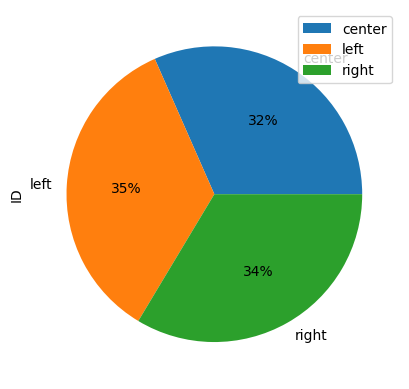

In [91]:
bias_raw_df.groupby('bias_text').count().plot(kind='pie', y='ID', autopct='%1.0f%%')

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bias_raw_df['content_original'], bias_raw_df['bias_text'], test_size=0.2, random_state=42)

In [93]:
#X_train[0]

# NLTK Pre-processing

In [94]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Tokenization
X_token_train = [word_tokenize(line)[:100] for line in X_train]
X_token_test = [word_tokenize(line)[:100] for line in X_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [95]:
print(X_token_train[0])

['Emails', 'sent', 'to', 'Hillary', 'Clinton', '’', 's', 'campaign', 'chairman', 'John', 'Podesta', 'reveal', '$', '3m', 'campaign', 'aimed', 'to', 'put', 'media', 'mogul', '‘', 'on', 'the', 'defensive', '’', 'and', 'help', 'conservative', 'politicians', 'support', 'global', 'warming', 'action', 'A', 'well-funded', 'international', 'campaign', 'to', 'counter', 'the', 'influence', 'of', 'Rupert', 'Murdoch', '’', 's', 'media', 'empire', 'on', 'climate', 'change', 'has', 'been', 'planned', ',', 'emails', 'to', 'Hillary', 'Clinton', '’', 's', 'campaign', 'chairman', 'reveal', '.', 'The', 'plan', 'to', 'use', '“', 'guerilla', 'tactics', '”', ',', 'civil', 'disobedience', 'and', 'targeted', 'advertising', 'appears', 'to', 'have', 'been', 'hatched', 'by', 'David', 'Fenton', ',', 'founder', 'of', 'Fenton', 'Communications', ',', 'a', 'US', 'public', 'relations', 'agency', '.', 'The']


In [96]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemma_X_train = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_train]
lemma_X_test = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_test]
print(lemma_X_train[0])

['Emails', 'sent', 'to', 'Hillary', 'Clinton', '’', 's', 'campaign', 'chairman', 'John', 'Podesta', 'reveal', '$', '3m', 'campaign', 'aimed', 'to', 'put', 'medium', 'mogul', '‘', 'on', 'the', 'defensive', '’', 'and', 'help', 'conservative', 'politician', 'support', 'global', 'warming', 'action', 'A', 'well-funded', 'international', 'campaign', 'to', 'counter', 'the', 'influence', 'of', 'Rupert', 'Murdoch', '’', 's', 'medium', 'empire', 'on', 'climate', 'change', 'ha', 'been', 'planned', ',', 'email', 'to', 'Hillary', 'Clinton', '’', 's', 'campaign', 'chairman', 'reveal', '.', 'The', 'plan', 'to', 'use', '“', 'guerilla', 'tactic', '”', ',', 'civil', 'disobedience', 'and', 'targeted', 'advertising', 'appears', 'to', 'have', 'been', 'hatched', 'by', 'David', 'Fenton', ',', 'founder', 'of', 'Fenton', 'Communications', ',', 'a', 'US', 'public', 'relation', 'agency', '.', 'The']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords
clear_X_train = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_train]
clear_X_test = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_test]
print(clear_X_train[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Emails', 'sent', 'Hillary', 'Clinton', '’', 'campaign', 'chairman', 'John', 'Podesta', 'reveal', '$', '3m', 'campaign', 'aimed', 'put', 'medium', 'mogul', '‘', 'defensive', '’', 'help', 'conservative', 'politician', 'support', 'global', 'warming', 'action', 'A', 'well-funded', 'international', 'campaign', 'counter', 'influence', 'Rupert', 'Murdoch', '’', 'medium', 'empire', 'climate', 'change', 'ha', 'planned', ',', 'email', 'Hillary', 'Clinton', '’', 'campaign', 'chairman', 'reveal', '.', 'The', 'plan', 'use', '“', 'guerilla', 'tactic', '”', ',', 'civil', 'disobedience', 'targeted', 'advertising', 'appears', 'hatched', 'David', 'Fenton', ',', 'founder', 'Fenton', 'Communications', ',', 'US', 'public', 'relation', 'agency', '.', 'The']


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiate a tfidf vectorizer object
vectorizer = TfidfVectorizer(preprocessor=' '.join)
# Fitting the training dataset and transform it
X_train_tfidf = vectorizer.fit_transform(clear_X_train)
# Transform the test dataset
X_test_tfidf = vectorizer.transform(clear_X_test)

print(X_train_tfidf.shape)

(400, 6654)


In [99]:
print(X_train_tfidf[0])

  (0, 734)	0.1404050583331656
  (0, 5696)	0.11248894292632855
  (0, 975)	0.1781901752942023
  (0, 512)	0.16163060036551163
  (0, 2760)	0.2662117600209626
  (0, 2832)	0.23184796147960285
  (0, 1101)	0.08081530018275582
  (0, 1594)	0.1404050583331656
  (0, 5547)	0.2808101166663312
  (0, 102)	0.1404050583331656
  (0, 2329)	0.11592398073980142
  (0, 5290)	0.10454092790024613
  (0, 4644)	0.17601573066592874
  (0, 4714)	0.13136982099294642
  (0, 3240)	0.1404050583331656
  (0, 4086)	0.09406753757373065
  (0, 3032)	0.08412263772047165
  (0, 5104)	0.11248894292632855
  (0, 6053)	0.08800786533296437
  (0, 3950)	0.10688874339958224
  (0, 6521)	0.13136982099294642
  (0, 2264)	0.09869449783351042
  (0, 6558)	0.10047814048665644
  (0, 3907)	0.13136982099294642
  (0, 4336)	0.10454092790024613
  :	:
  (0, 3530)	0.13136982099294642
  (0, 2907)	0.11592398073980142
  (0, 2840)	0.08909508764710115
  (0, 4015)	0.049168169800592
  (0, 5066)	0.11998676815339113
  (0, 3513)	0.11592398073980142
  (0, 1989)	0.0

In [100]:
import gensim

D = gensim.corpora.Dictionary(clear_X_train)
print(D)

Dictionary<6969 unique tokens: ['$', ',', '.', '3m', 'A']...>


In [101]:
train_indices = [[D.token2id[t] for t in line] for line in clear_X_train]
test_indices = [[D.token2id[t] if t in D else len(D) for t in line] for line in clear_X_test]

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

train_tensor = pad_sequence([torch.tensor(line) for line in train_indices],
                            batch_first=True,
                            padding_value=len(D)+2)
test_tensor = pad_sequence([torch.tensor(line) for line in test_indices],
                           batch_first=True,
                           padding_value=len(D)+2)

X_train_seq = nn.functional.one_hot(train_tensor)
X_test_seq = nn.functional.one_hot(test_tensor)

print(X_train_seq.shape)
print(X_test_seq.shape)

torch.Size([400, 85, 6972])
torch.Size([100, 81, 6972])


# Baseline Models with sklearn

In [102]:
from sklearn.linear_model import RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_tfidf, y_train)

RidgeClassifier()

In [103]:
ridge_classifier_prediction = ridge_classifier.predict(X_test_tfidf)

In [104]:
ridge_classifier_accuracy = accuracy_score(y_test, ridge_classifier_prediction)
ridge_classifier_f1 = f1_score(y_test, ridge_classifier_prediction, average='weighted')

print(f"Ridge Classifier Accuracy: {ridge_classifier_accuracy}")
print(f"Ridge Classifier F1 Score: {ridge_classifier_f1}")

Ridge Classifier Accuracy: 0.59
Ridge Classifier F1 Score: 0.5905780135357601


In [105]:
dummy_classifer = DummyClassifier(strategy='most_frequent')
dummy_classifer.fit(X_train_tfidf, y_train)

DummyClassifier(strategy='most_frequent')

In [106]:
dummy_classifer_prediction = dummy_classifer.predict(X_test_tfidf)

dummy_classifer_accuracy = accuracy_score(y_test, dummy_classifer_prediction)
dummy_classifer_f1 = f1_score(y_test, dummy_classifer_prediction, average='weighted')

print(f"Dummy Classifier Accuracy: {dummy_classifer_accuracy}")
print(f"Dummy Classifier F1 Score: {dummy_classifer_f1}")

Dummy Classifier Accuracy: 0.29
Dummy Classifier F1 Score: 0.1303875968992248


# Torch RNN Models

## Baseline RNN

In [107]:
# # Simple tensor operations
# import torch

# # Putting data into a tensor
# X_train_tensor = torch.tensor(X_train_tfidf.toarray()).float()
# X_test_tensor = torch.tensor(X_test_tfidf.toarray()).float()

In [108]:
import torch.nn as nn

class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_of_classes=3):  # Default hidden layer size is 128 nodes
        super(RNNNet, self).__init__()
        self.hidden_size = hidden_size
        # Define the RNN layer
        self.rnn_layer = nn.RNN(input_size,
                                hidden_size,
                                batch_first=True,
                                nonlinearity='tanh')  # Use 'relu' or 'tanh'
        # Define the output layer
        self.output_layer = nn.Linear(hidden_size, num_of_classes)

    def forward(self, x):
        # Run the RNN layer and ignore the hidden state
        output, hidden = self.rnn_layer(x)  # `hidden` contains the final hidden state
        return self.output_layer(hidden[-1])  # Use the final hidden state


In [109]:
lr = 0.01 # Learning rate
epochs = 300 # Training epochs

input_size = X_train_seq.shape[-1] # Extract the last dimension

model = RNNNet(input_size).to("cuda:0")

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [110]:
import numpy as np
# Define the custom mapping
custom_mapping = {'left': 0, 'center': 1, 'right': 2}

# Map the y_train and y_test using the custom mapping
y_train_mapped = [custom_mapping[label] for label in y_train]
y_test_mapped = [custom_mapping[label] for label in y_test]

# Convert to numpy arrays if needed (optional for some models)
y_train_encoded = np.array(y_train_mapped)
y_test_encoded = np.array(y_test_mapped)

# Print the custom mapping (optional)
print(custom_mapping)  # {'left': 0, 'center': 1, 'right': 2}


{'left': 0, 'center': 1, 'right': 2}


In [111]:
model

RNNNet(
  (rnn_layer): RNN(6972, 128, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=3, bias=True)
)

In [112]:
# Putting labels in tensors
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    # Forward pass
    predictions = model(X_train_seq.float().to("cuda:0"))
    # Calculate the loss -- the squeeze ensures the dimensions are consistent
    loss = loss_func(torch.squeeze(predictions), y_train_tensor.to("cuda:0"))

    # Model clean gradient
    optimizer.zero_grad()
    # Model backward pass to get the gradient
    loss.backward()
    # Model updating weights
    optimizer.step()

    # Print the training process
    if e % 20 == 0:
        print("Epoch:", e, "loss:", loss.item())

Epoch: 0 loss: 1.105175495147705
Epoch: 20 loss: 1.079297661781311
Epoch: 40 loss: 1.1892726421356201
Epoch: 60 loss: 1.1099772453308105
Epoch: 80 loss: 1.0313698053359985
Epoch: 100 loss: 1.0848900079727173
Epoch: 120 loss: 1.0864367485046387
Epoch: 140 loss: 1.08576500415802
Epoch: 160 loss: 1.0856019258499146
Epoch: 180 loss: 1.0855690240859985
Epoch: 200 loss: 1.0855463743209839
Epoch: 220 loss: 1.085516333580017
Epoch: 240 loss: 1.0854741334915161
Epoch: 260 loss: 1.0854158401489258
Epoch: 280 loss: 1.0853368043899536


In [119]:
from sklearn import metrics

# Forward pass on test set
y_pred = model(X_test_seq.float().to("cuda:0"))

# Convert model output to predicted class indices
y_pred_classes = torch.argmax(y_pred, dim=1)

# Convert ground truth to numpy
y_test_numpy = y_test_tensor.cpu().numpy()

# Calculate accuracy
test_accuracy = metrics.accuracy_score(y_test_numpy, y_pred_classes.cpu().numpy())
test_f1 = metrics.f1_score(y_test_numpy, y_pred_classes.cpu().numpy(), average='weighted')
print("Test Accuracy:", test_accuracy)
print("Test F1:", test_f1)



Test Accuracy: 0.29
Test F1: 0.1303875968992248


## LSTM

In [127]:
class MultilayerLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(MultilayerLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take the last hidden state
        return out

torch.Size([64, 3])


In [131]:
lr = 0.01 # Learning rate
epochs = 70 # Training epochs

input_size = X_train_seq.shape[-1] # Extract the last dimension

model = MultilayerLSTM(input_size, hidden_size, num_layers, num_classes)
hidden_size = 512
num_layers = 3
num_classes = 3

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [132]:
model

MultilayerLSTM(
  (lstm): LSTM(6972, 512, num_layers=3, batch_first=True)
  (fc): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
# Putting labels in tensors
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    # Forward pass
    predictions = model(X_train_seq.float())
    # Calculate the loss -- the squeeze ensures the dimensions are consistent
    loss = loss_func(torch.squeeze(predictions), y_train_tensor)

    # Model clean gradient
    optimizer.zero_grad()
    # Model backward pass to get the gradient
    loss.backward()
    # Model updating weights
    optimizer.step()

    # Print the training process
    if e % 20 == 0:
        print("Epoch:", e, "loss:", loss.item())

Epoch: 0 loss: 1.0982728004455566
Epoch: 20 loss: 1.0945885181427002


In [1]:
# Forward pass on test set
y_pred = model(X_test_seq.float().to("cuda:0"))

# Convert model output to predicted class indices
y_pred_classes = torch.argmax(y_pred, dim=1)

# Convert ground truth to numpy
y_test_numpy = y_test_tensor.cpu().numpy()

# Calculate accuracy
test_accuracy = metrics.accuracy_score(y_test_numpy, y_pred_classes.cpu().numpy())
test_f1 = metrics.f1_score(y_test_numpy, y_pred_classes.cpu().numpy(), average='weighted')
print("Test Accuracy:", test_accuracy)
print("Test F1:", test_f1)

NameError: name 'model' is not defined